In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df=pd.read_excel('testovaci_dataset_BP.xlsx', sheet_name='Sheet1') 
df.sample(5) #vypisuje pocet random radku 

,Nazev,Soudni spory,Sidlo,Status,Pocet let na trhu,Rust zak. kapitalu,Pocet jinych subjektu,Jine subjekty v lividace,Status domeny,Pravni forma,Pocet zamestnancu,Rust poctu zam.,Dlunzniky,Nespolehlivy platce,Pocet jednatelu,Ochranne znamky
10,"FAINSTAV, s.r.o.",1,Ostrožská Nová Ves,2,21,2,9,0,1,1,19,2,2,2,2,2
0,ABL PETROVICE,2,Petrovice,2,13,2,26,2,1,1,19,2,2,2,2,2
7,HOTEL ZÁMEČEK MIKULOV s.r.o.,2,Brno,2,22,2,4,0,1,1,19,2,2,2,4,2
11,SABIL s.r.o.,2,Brno,2,17,2,1,0,1,1,19,2,2,2,1,2
8,Stanislav Mádl,2,Velké Bílovice,2,16,1,1,0,1,1,19,2,2,2,1,2


In [3]:
col=['Pocet jednatelu','Status','Soudni spory' , 'Pocet let na trhu',
       'Rust zak. kapitalu', 'Pocet jinych subjektu',
       'Jine subjekty v lividace', 'Status domeny', 'Pravni forma',
       'Pocet zamestnancu', 'Rust poctu zam.',
       'Nespolehlivy platce',  'Ochranne znamky']
x = df.loc[:, col].values
# Separating out the target
y = df.loc[:,['Sidlo']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [18]:
pca = PCA()
x_pca = pca.fit_transform(x)

#Merge with df
pca_df = pd.DataFrame(x_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])
df1 = pd.merge(df, pca_df, right_index=True, left_index=True)

In [5]:
print('Explained Variance Ratio')
for i in range(13):
    print('PC{}: {}'.format(i+1,pca.explained_variance_ratio_[i]*100))

Explained Variance Ratio
PC1: 35.49637777322828
PC2: 22.358147150501072
PC3: 16.666068431054246
PC4: 6.882228240808455
PC5: 5.632990831944432
PC6: 3.1239510536659365
PC7: 2.7684815094394044
PC8: 2.287896951945235
PC9: 1.6882594029029636
PC10: 1.5680242635361126
PC11: 1.0811747507532143
PC12: 0.33198479692672095
PC13: 0.11441484329391496


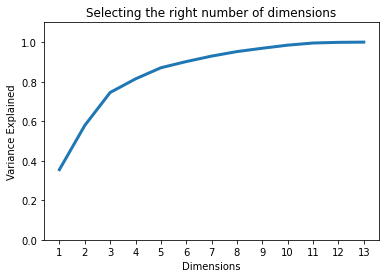

In [6]:
pca = PCA()
pca.fit(x)

cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.arange(len(cumsum))+1

plt.plot(dim,cumsum,'-',lw=3);

plt.xlabel('Dimensions')
plt.ylabel('Variance Explained')
plt.title('Selecting the right number of dimensions')

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13])
plt.ylim([0,1.1]);

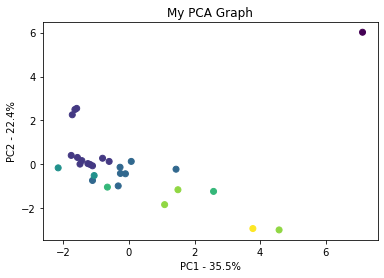

In [7]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
plt.scatter(pca_df.PC1, pca_df.PC2,c=df['Pocet jednatelu'])
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.rcParams["figure.figsize"]=20,20
 
plt.show()

<Figure size 480x480 with 0 Axes>

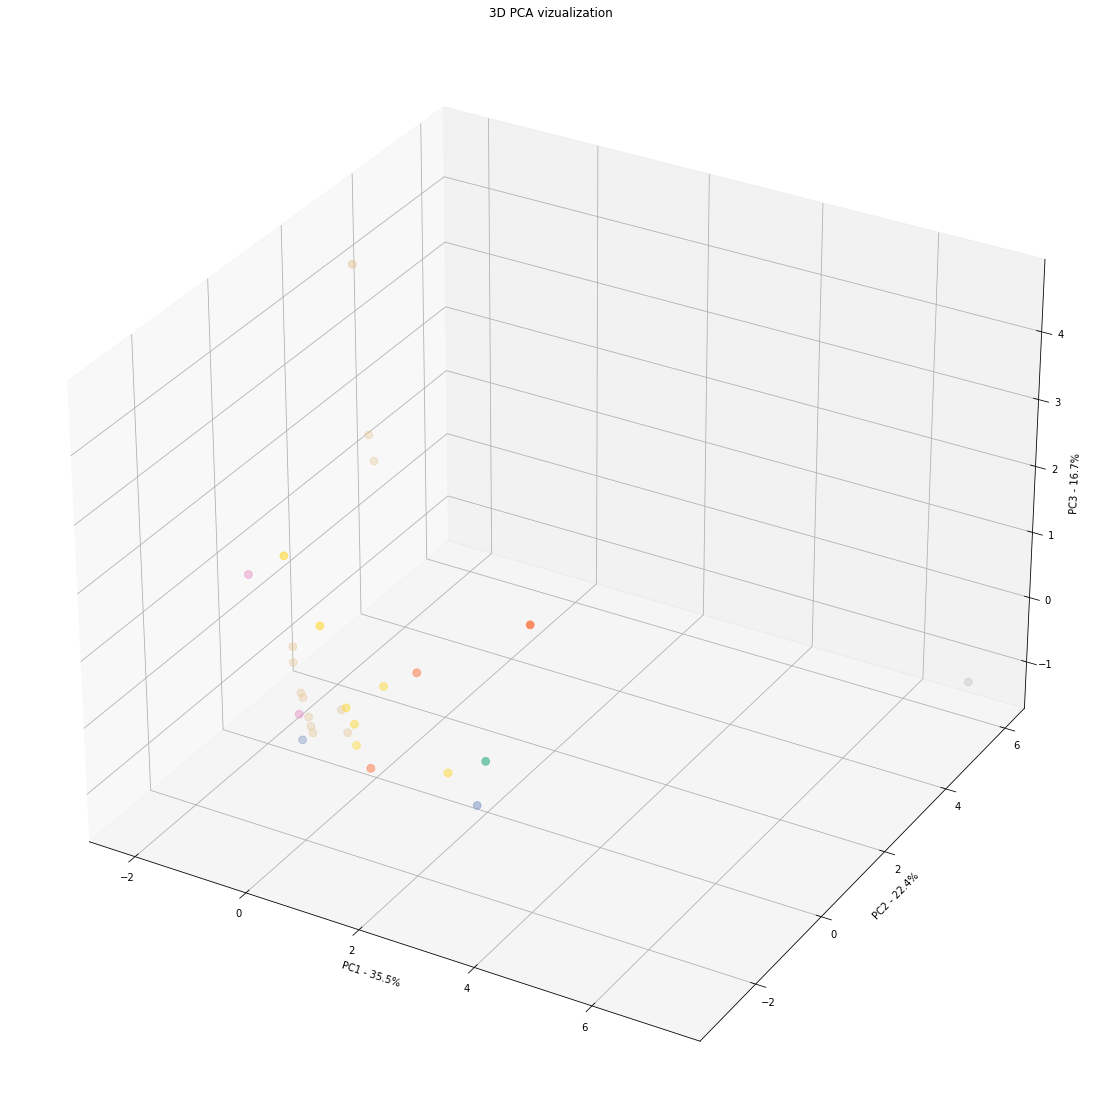

In [8]:

# create figure
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df.PC1, pca_df.PC2, pca_df.PC3, c=df['Pocet jednatelu'], cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
# xAxisLine = ((min(pca_df.PC1), max(pca_df.PC1)), (0, 0), (0,0))
# ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
# yAxisLine = ((0, 0), (pca_df.PC2), max(pca_df.PC2), (0,0))
# ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
# zAxisLine = ((0, 0), (0,0), (min(pca_df.PC3), max(pca_df.PC3)))
# ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

# label the axes
ax.set_xlabel("PC1 - {0}%".format(per_var[0]))
ax.set_ylabel("PC2 - {0}%".format(per_var[1]))
ax.set_zlabel("PC3 - {0}%".format(per_var[2]))
ax.set_title("3D PCA vizualization")
plt.show()

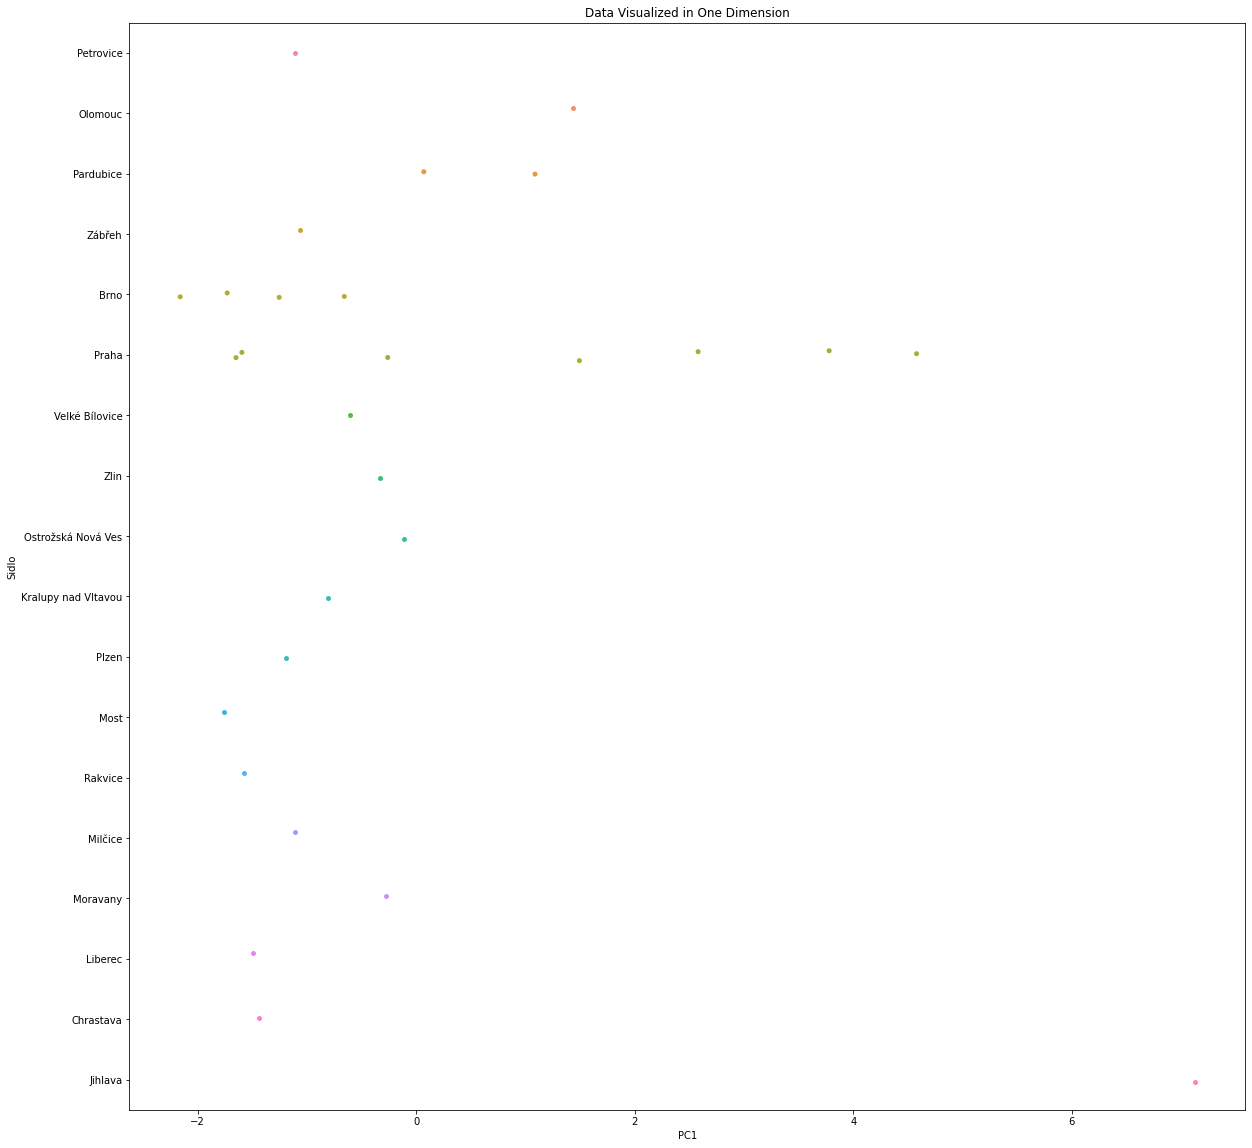

In [19]:
sns.stripplot(x="PC1", y="Sidlo", data=df1,jitter=True)
plt.title('Data Visualized in One Dimension');

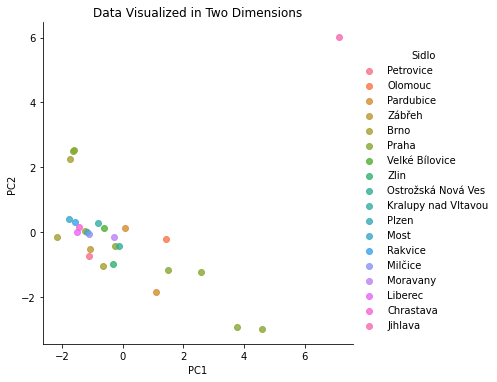

In [20]:
sns.lmplot(x='PC1',y='PC2',data=df1,hue='Sidlo',fit_reg=False)
plt.title('Data Visualized in Two Dimensions');